# Hagar Shalabi 206002

In [34]:
!pip install imblearn

In [199]:
#import all the libraries i'll be using here
import pandas as pd
from scipy.io import arff #For import the arff file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
##from google.colab import drive
##drive.mount('/content/drive') 
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from imblearn.pipeline import Pipeline as imbPipeline

#### **Dataset used: https://www.openml.org/search?type=data&sort=runs&status=active&id=4534**

In [200]:
data = arff.loadarff('phpV5QYya.arff')
data= pd.DataFrame(data[0])
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


### Quick Data Exploration

In [201]:
#Getting the dimensions of the dataset (rows=instances, columns=features)
data.shape

(11055, 31)

In [202]:
#Seeing what features i'll be working with
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [203]:
#Seeing the features' bounds (the max, min and the median)
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,b'1',b'-1',b'1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'0',b'1',b'1'
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


In [204]:
#Seeing what are the columns' datatypes (If non-numerical, then drop. I'll be working numbers)
data.dtypes

having_IP_Address              object
URL_Length                     object
Shortining_Service             object
having_At_Symbol               object
double_slash_redirecting       object
Prefix_Suffix                  object
having_Sub_Domain              object
SSLfinal_State                 object
Domain_registeration_length    object
Favicon                        object
port                           object
HTTPS_token                    object
Request_URL                    object
URL_of_Anchor                  object
Links_in_tags                  object
SFH                            object
Submitting_to_email            object
Abnormal_URL                   object
Redirect                       object
on_mouseover                   object
RightClick                     object
popUpWidnow                    object
Iframe                         object
age_of_domain                  object
DNSRecord                      object
web_traffic                    object
Page_Rank   

### Data Preprocessing/Cleaning

#### We will not be dropping any duplicates as our duplicates take up around 50% of our dataset. Duplicates can be helpful in training and generalizing our models. 

In [205]:
#Checking for any copies 
data.duplicated().sum() 

5206

In [206]:
##Remaining columns: convert to appropriate datatypes (we'll be using that later)
le = preprocessing.LabelEncoder()
for i in data.columns:
    label=LabelEncoder()
    data[i]=label.fit_transform(data[i])
    data.tail()
data.dtypes 

having_IP_Address              int32
URL_Length                     int32
Shortining_Service             int32
having_At_Symbol               int32
double_slash_redirecting       int32
Prefix_Suffix                  int32
having_Sub_Domain              int32
SSLfinal_State                 int32
Domain_registeration_length    int32
Favicon                        int32
port                           int32
HTTPS_token                    int32
Request_URL                    int32
URL_of_Anchor                  int32
Links_in_tags                  int32
SFH                            int32
Submitting_to_email            int32
Abnormal_URL                   int32
Redirect                       int32
on_mouseover                   int32
RightClick                     int32
popUpWidnow                    int32
Iframe                         int32
age_of_domain                  int32
DNSRecord                      int32
web_traffic                    int32
Page_Rank                      int32
G

In [207]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,2,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,2,0,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,0,0,1,0,1,2,1,0
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,2,0,1,1,0,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,0,0,2,0,1,0,1,0
4,1,1,0,1,1,0,2,2,0,1,...,0,1,0,0,1,0,1,2,1,1


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int32
 1   URL_Length                   11055 non-null  int32
 2   Shortining_Service           11055 non-null  int32
 3   having_At_Symbol             11055 non-null  int32
 4   double_slash_redirecting     11055 non-null  int32
 5   Prefix_Suffix                11055 non-null  int32
 6   having_Sub_Domain            11055 non-null  int32
 7   SSLfinal_State               11055 non-null  int32
 8   Domain_registeration_length  11055 non-null  int32
 9   Favicon                      11055 non-null  int32
 10  port                         11055 non-null  int32
 11  HTTPS_token                  11055 non-null  int32
 12  Request_URL                  11055 non-null  int32
 13  URL_of_Anchor                11055 non-null  i

In [209]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.656897,0.366802,0.869380,0.850294,0.870737,0.132519,1.063953,1.250927,0.331615,0.814292,...,0.806694,0.908458,0.530620,0.688557,1.287291,0.258164,0.860787,1.344007,0.859792,0.556943
std,0.474767,0.766095,0.336999,0.356799,0.335506,0.339070,0.817518,0.911892,0.470815,0.388888,...,0.394909,0.288392,0.499084,0.463104,0.827733,0.437644,0.346184,0.569944,0.347218,0.496769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000


### Visualizing the Data Distributions and Outliers 

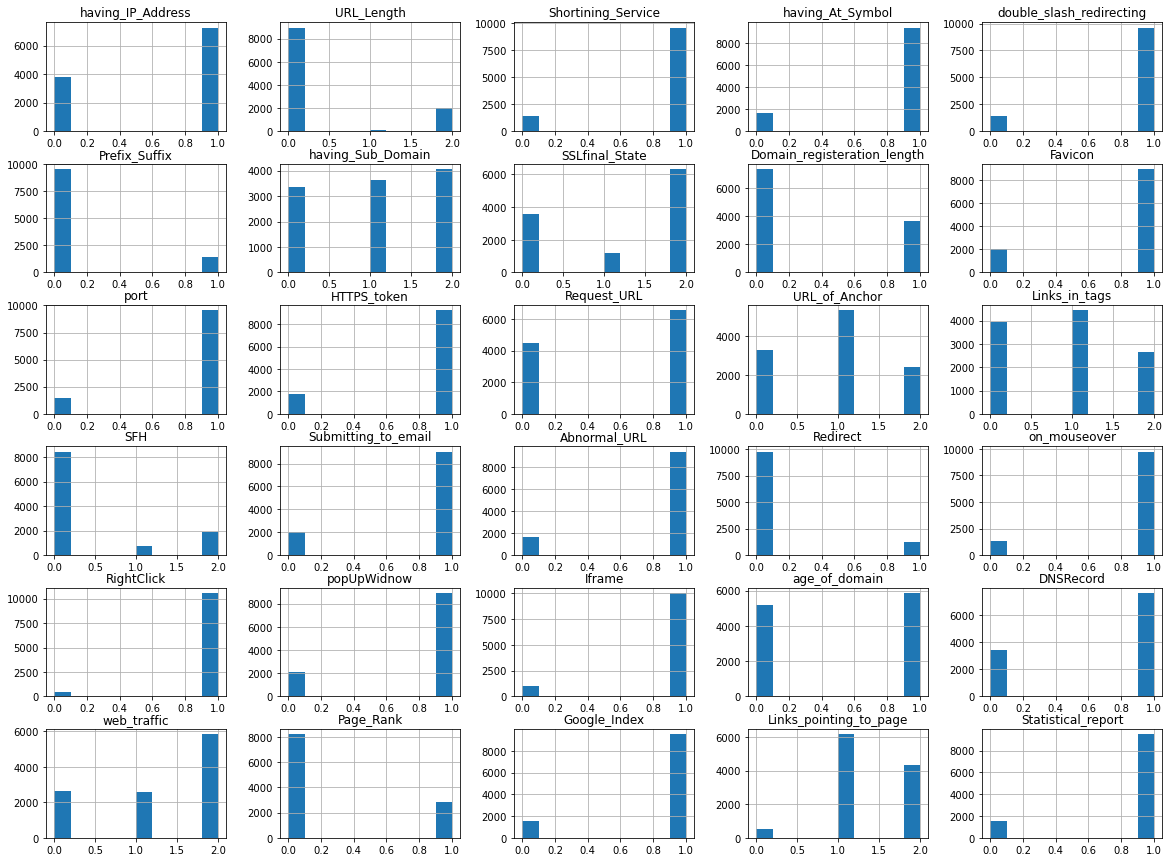

In [210]:
data.iloc[:,:-1].hist(figsize=(20, 15))
plt.show()

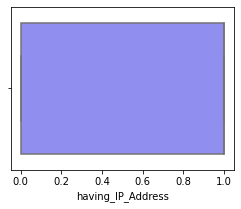

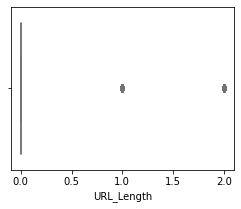

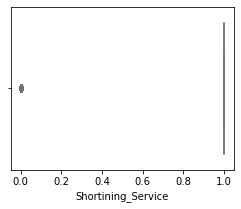

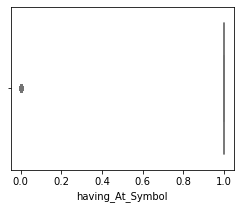

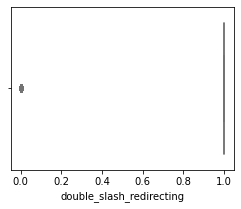

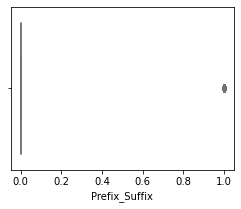

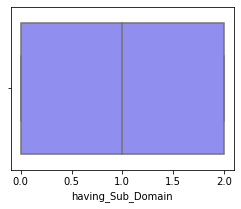

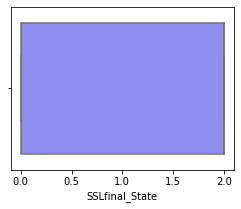

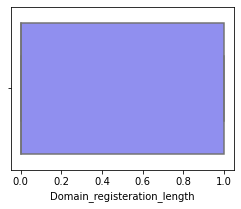

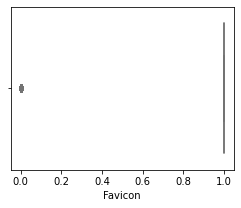

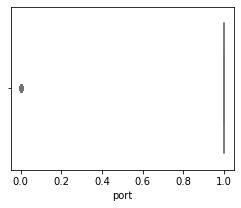

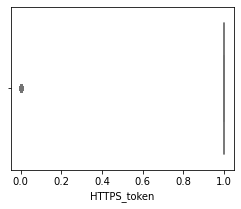

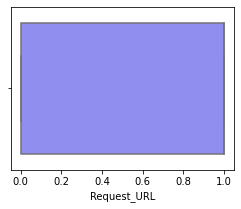

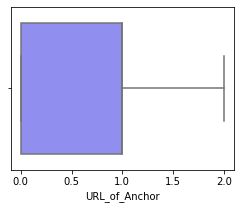

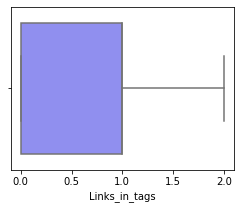

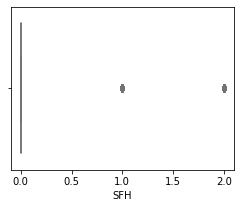

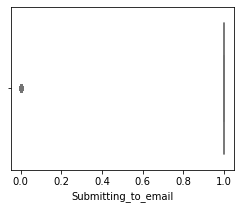

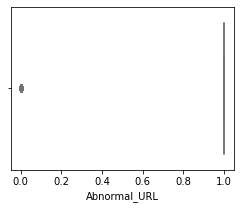

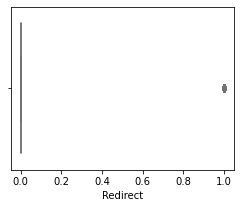

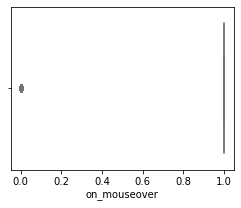

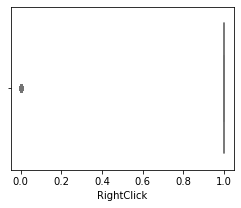

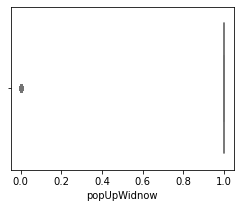

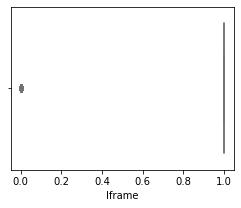

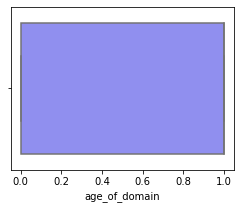

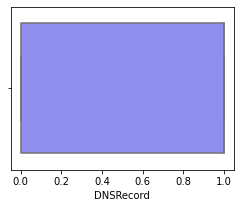

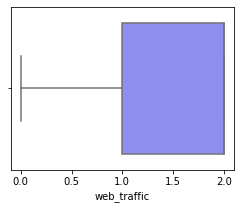

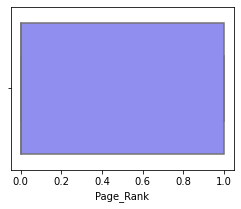

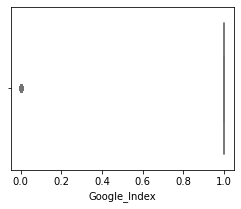

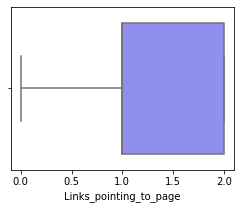

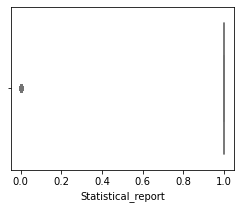

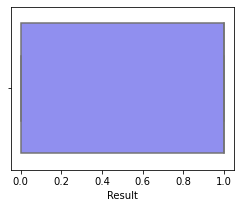

In [211]:
for i in data.columns:
    if i=="Results":
        break
    plt.figure(figsize=(4,3))
    ax = sns.boxplot(x=data[i],palette="cool")
    ax.set_xlabel(i,fontsize=10)
    plt.show()

In [212]:
## Splitting the dataset to x and y
X=data.iloc[:,:-1]
Y=data['Result']

#### Comparing between Outlier detection methods

In [213]:
for x in [0.1,0.2,0.3,0.4]:
    Gaussian =  EllipticEnvelope(contamination=x)
    result=Gaussian.fit_predict(X)
    Outliers=X[result==-1]
    print(str(x) +": " +str(len(Outliers)))

0.1: 1106
0.2: 2210
0.3: 3317
0.4: 4422


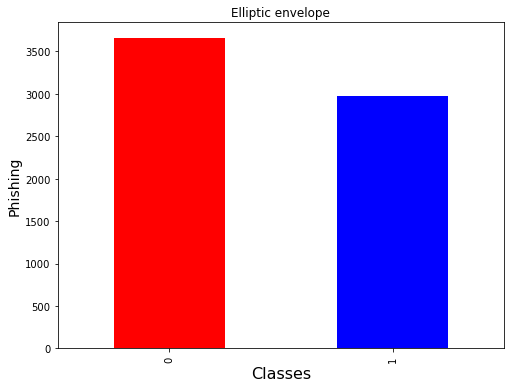

In [214]:
ax=Y[result!=-1].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='Elliptic envelope',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("Classes",fontsize=16)
ax.set_ylabel("Phishing",fontsize=14)
plt.show()

In [215]:
for x in range(3, 20, 2):
    KNN =  LocalOutlierFactor(n_neighbors=x)
    result2=KNN.fit_predict(X)
    Outliers=X[result2==-1]
    print(str(x)+": "+str(len(Outliers)))

3: 1905
5: 1805
7: 1534
9: 1018
11: 733
13: 620
15: 618
17: 501
19: 508


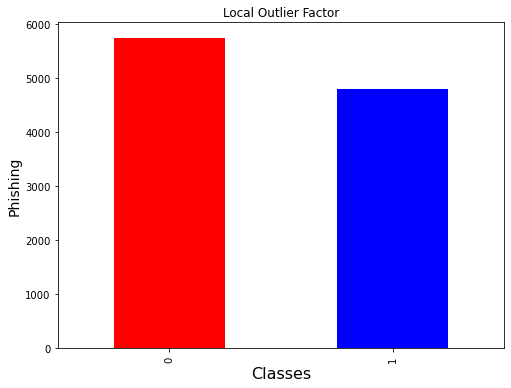

In [216]:
ax=Y[result2!=-1].value_counts().plot(kind='bar',color=['red','blue'],
                                          title='Local Outlier Factor',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("Classes",fontsize=16)
ax.set_ylabel("Phishing",fontsize=14)
plt.show()

In [217]:
for x in range(1, 20, 2):
    IF =  IsolationForest(n_estimators=x,random_state = 42)
    result3=IF.fit_predict(X)
    Outliers=X[result3==-1]
    print(str(x)+": "+ str(len(Outliers)))

1: 4317
3: 4349
5: 4054
7: 3849
9: 4119
11: 4027
13: 4160
15: 4096
17: 4078
19: 4000


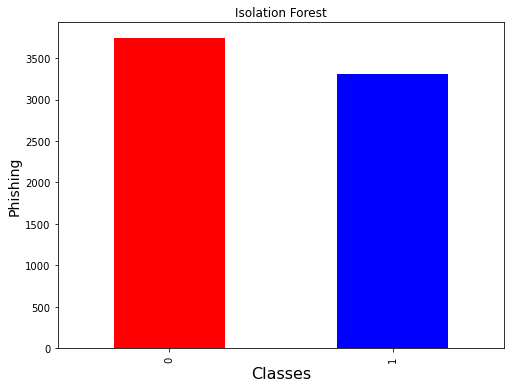

In [218]:
ax=Y[result3!=-1].value_counts().plot(kind='bar',color=['red','blue'],
                                          title='Isolation Forest',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("Classes",fontsize=16)
ax.set_ylabel("Phishing",fontsize=14)
plt.show()

### This concludes that we'll be using Local Outlier Factor (KNN) as it has the lowest number of outliers to be dropped. (WE DONT WANT TO DROP ALL THE OUTLIERS BECAUSE THEY ARE STILL DATA (important features))

In [219]:
KNN =  LocalOutlierFactor(n_neighbors=19)
result2=KNN.fit_predict(X)
knn_Outliers=X[result2==-1]
print(str(x)+": "+str(len(knn_Outliers)))

19: 508


In [220]:
## Remove the outliers from x_dataset and y_dataset then split them again 
newX=X[result2!=-1]
newY=Y[result2!=-1]

In [221]:
newX.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
count,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,...,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000
mean,0.645207,0.377169,0.867640,0.849625,0.868873,0.133024,1.052053,1.224519,0.340571,0.808382,...,0.955912,0.800986,0.905945,0.517872,0.679340,1.267754,0.262255,0.860529,1.363136,0.859581
std,0.478473,0.775577,0.338898,0.357455,0.337556,0.339616,0.812291,0.916500,0.473924,0.393593,...,0.205301,0.399277,0.291919,0.499704,0.466752,0.831297,0.439881,0.346454,0.568066,0.347438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000


#### The minimum and max ranges from [0:2] or [0:1] so the scalling of the data is not needed

## CHOOSING THE BEST BALANCING METHOD FOR SVM AND ADABOOSTING

## 1. SVM

### 1.1 Random Oversampling

In [222]:
overSampler = RandomOverSampler(random_state=42)
overX1,overY1=overSampler.fit_resample(newX, newY)
x_trainA, x_testA, y_trainA, y_testA = train_test_split(overX1, overY1, test_size=0.3,random_state=42)

In [223]:
rf= SVC(kernel='rbf', random_state=42)
rf.fit(x_trainA, y_trainA)
y_predA=rf.predict(x_testA)

In [224]:
print("ACC of model: %.4f After random Oversampling" %accuracy_score(y_predA,y_testA))

ACC of model: 0.9545 After random Oversampling


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


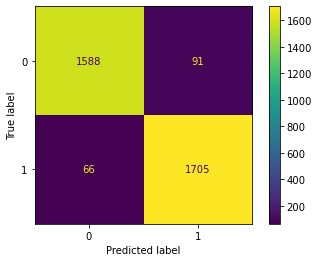

In [225]:
plot_confusion_matrix(rf,x_testA,y_testA)

In [226]:
#Classification Report
print(classification_report(y_testA, y_predA, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1679
           1       0.95      0.96      0.96      1771

    accuracy                           0.95      3450
   macro avg       0.95      0.95      0.95      3450
weighted avg       0.95      0.95      0.95      3450



In [227]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(rf, x_trainA.values, y_trainA.values, x_testA.values, y_testA.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.047
Bias: 0.039
Variance: 0.008


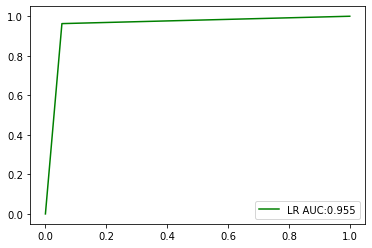

In [228]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_predA, y_testA)

fpr, tpr, thresholds = roc_curve(y_testA, y_predA)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## 1.2 Undersampling

In [229]:
underSampler = RandomUnderSampler(random_state=42)
underX1,underY1=underSampler.fit_resample(newX, newY)

In [230]:
x_trainB, x_testB, y_trainB, y_testB = train_test_split(underX1, underY1, test_size=0.3,random_state=42)
rf= SVC(kernel='rbf', random_state=42)
rf.fit(x_trainB, y_trainB)
y_predB=rf.predict(x_testB)

In [231]:
print("ACC of model: %.4f After random Undersampling" %accuracy_score(y_predB,y_testB))

ACC of model: 0.9441 After random Undersampling


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


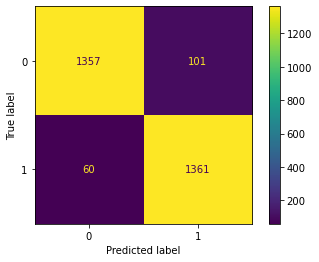

In [232]:
plot_confusion_matrix(rf,x_testB,y_testB)

In [233]:
#Classification Report
print(classification_report(y_testB, y_predB, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1458
           1       0.93      0.96      0.94      1421

    accuracy                           0.94      2879
   macro avg       0.94      0.94      0.94      2879
weighted avg       0.94      0.94      0.94      2879



In [234]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(rf, x_trainB.values, y_trainB.values, x_testB.values, y_testB.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.058
Bias: 0.049
Variance: 0.008


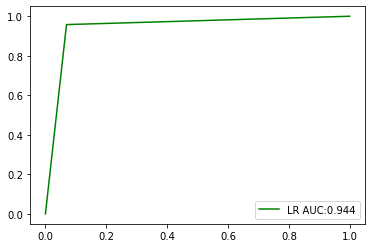

In [235]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_predB, y_testB)

fpr, tpr, thresholds = roc_curve(y_testB, y_predB)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

## 1.3 Synthetic Minority Oversampling Technique (SMOTE)

In [236]:
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(newX, newY)

In [237]:
x_trainC, x_testC, y_trainC, y_testC = train_test_split(overX, overY, test_size=0.3,random_state=42)
rf= SVC(kernel='rbf', random_state=42)
rf.fit(x_trainC, y_trainC)
y_predC=rf.predict(x_testC)

In [238]:
print("ACC of model: %.4f After random Oversampling" %accuracy_score(y_predC,y_testC))

ACC of model: 0.9574 After random Oversampling


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


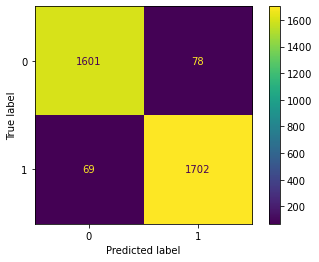

In [239]:
plot_confusion_matrix(rf,x_testC,y_testC)

In [240]:
#Classification Report
print(classification_report(y_testC, y_predC, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1679
           1       0.96      0.96      0.96      1771

    accuracy                           0.96      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.96      0.96      0.96      3450



In [241]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(rf, x_trainC.values, y_trainC.values, x_testC.values, y_testC.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.045
Bias: 0.037
Variance: 0.008


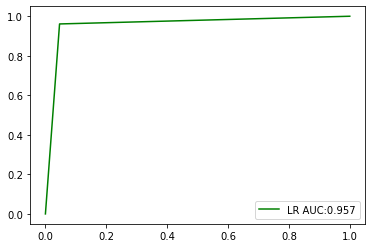

In [242]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_predC, y_testC)

fpr, tpr, thresholds = roc_curve(y_testC, y_predC)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

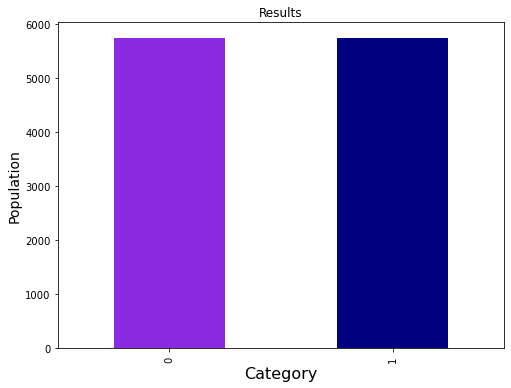

In [122]:
# First over sampling to make all classes equal
# As observed after undersampling , the two classes are balanced 
ax=pd.DataFrame(overY,columns=['Result'])['Result'].value_counts().plot(kind='bar',color=['blueviolet','navy'],
                                          title='Results',figsize=(8, 6))

plt.xticks(range(2),['0','1'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Population",fontsize=14)
plt.show()

#### The data is imbalanced so we will use SMOTE because other data resampling techniques may result in data loss because they decrease the majority class

#### Why are we not using Random Sampling over SMOTE: Minority data would just be duplicated, increasing the data population to become balanced with the majority data. This does not give new data--> no variation. 

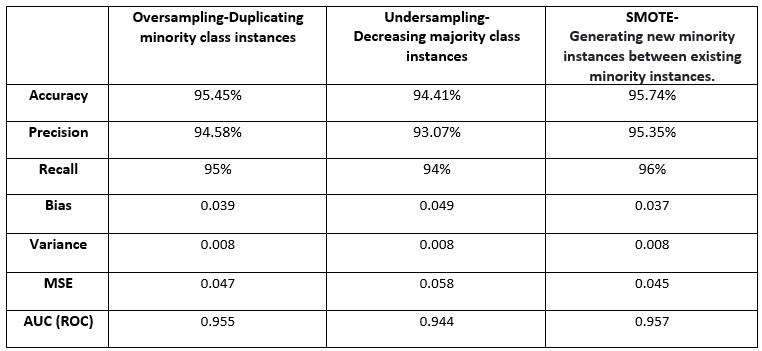

In [1]:
from IPython.display import Image
Image(filename='../Assignment2/Images/svmbalance.jpg', width=500)

In [ ]:
Comment: 
•	SMOTE is the best method to balance the dataset in accuracy and precision, as it generates new samples from the minority class rather than duplicating the minority class instances (oversampling) or lowering the majority class samples (undersampling). 
•	Removing majority class samples can be biased and can lead to inaccuracy in the model. Also it might remove useful samples which we would need.  Thus, making Undersampling the worse method to balance this dataset. 
•	Duplicating existing samples can lead to overfitting (high variance). This also increases training, making it slower to compute. However, after mentioning all that this method is better than Undersampling when balancing this dataset.  
•	Even SMOTE-based model outperforms the others in sensitivity (TPR) too and it has the lowest bias (no data generalization) and variance (no data noise). 

## 2. AdaBoost

### 2.1 Random Oversampling

In [243]:
overSampler = RandomOverSampler(random_state=42)
overX1,overY1=overSampler.fit_resample(newX, newY)
x_trainA, x_testA, y_trainA, y_testA = train_test_split(overX1, overY1, test_size=0.3,random_state=42)
rf= AdaBoostClassifier(random_state=42)
rf.fit(x_trainA, y_trainA)
y_predA=rf.predict(x_testA)

In [244]:
print("ACC of model: %.4f After random Oversampling" %accuracy_score(y_predA,y_testA))

ACC of model: 0.9377 After random Oversampling


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


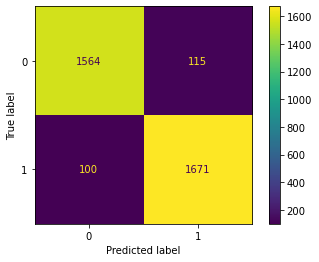

In [245]:
plot_confusion_matrix(rf,x_testA,y_testA)

In [246]:
#Classification Report
print(classification_report(y_testA, y_predA, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1679
           1       0.94      0.94      0.94      1771

    accuracy                           0.94      3450
   macro avg       0.94      0.94      0.94      3450
weighted avg       0.94      0.94      0.94      3450



In [247]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(rf, x_trainA.values, y_trainA.values, x_testA.values, y_testA.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.064
Bias: 0.057
Variance: 0.007


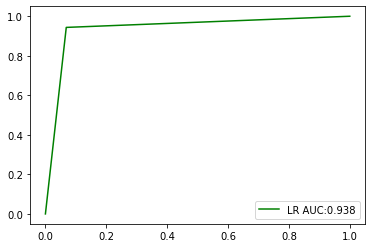

In [248]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_predA, y_testA)

fpr, tpr, thresholds = roc_curve(y_testA, y_predA)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

### 2.2 Undersampling

In [249]:
underSampler = RandomUnderSampler(random_state=42)
underX1,underY1=underSampler.fit_resample(newX, newY)
x_trainB, x_testB, y_trainB, y_testB = train_test_split(underX1, underY1, test_size=0.3,random_state=42)
rf= AdaBoostClassifier(random_state=42)
rf.fit(x_trainB, y_trainB)
y_predB=rf.predict(x_testB)

In [250]:
print("ACC of model: %.4f After random Undersampling" %accuracy_score(y_predB,y_testB))

ACC of model: 0.9354 After random Undersampling


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


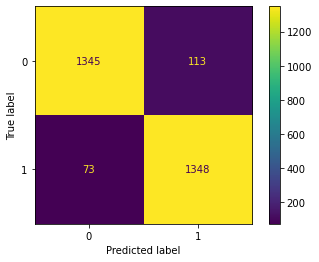

In [251]:
plot_confusion_matrix(rf,x_testB,y_testB)

In [252]:
#Classification Report
print(classification_report(y_testB, y_predB, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1458
           1       0.92      0.95      0.94      1421

    accuracy                           0.94      2879
   macro avg       0.94      0.94      0.94      2879
weighted avg       0.94      0.94      0.94      2879



In [253]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(rf, x_trainB.values, y_trainB.values, x_testB.values, y_testB.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.068
Bias: 0.061
Variance: 0.007


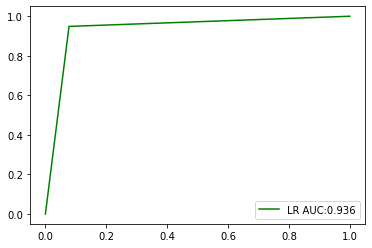

In [254]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_predB, y_testB)

fpr, tpr, thresholds = roc_curve(y_testB, y_predB)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

### 2.3 SMOTE

In [255]:
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(newX, newY)
x_trainC, x_testC, y_trainC, y_testC = train_test_split(overX, overY, test_size=0.3,random_state=42)
rf= AdaBoostClassifier(random_state=42)
rf.fit(x_trainC, y_trainC)
y_predC=rf.predict(x_testC)

In [256]:
print("ACC of model: %.4f After random Oversampling" %accuracy_score(y_predC,y_testC))

ACC of model: 0.9417 After random Oversampling


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


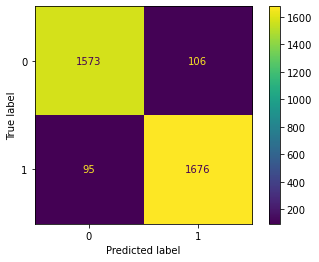

In [257]:
plot_confusion_matrix(rf,x_testC,y_testC)

In [258]:
#Classification Report
print(classification_report(y_testC, y_predC, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1679
           1       0.94      0.95      0.94      1771

    accuracy                           0.94      3450
   macro avg       0.94      0.94      0.94      3450
weighted avg       0.94      0.94      0.94      3450



In [259]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(rf, x_trainC.values, y_trainC.values, x_testC.values, y_testC.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.060
Bias: 0.055
Variance: 0.006


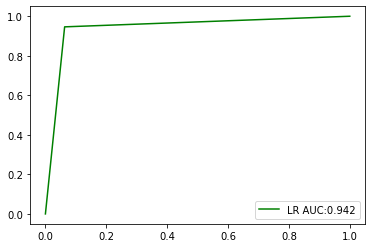

In [260]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_predC, y_testC)

fpr, tpr, thresholds = roc_curve(y_testC, y_predC)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

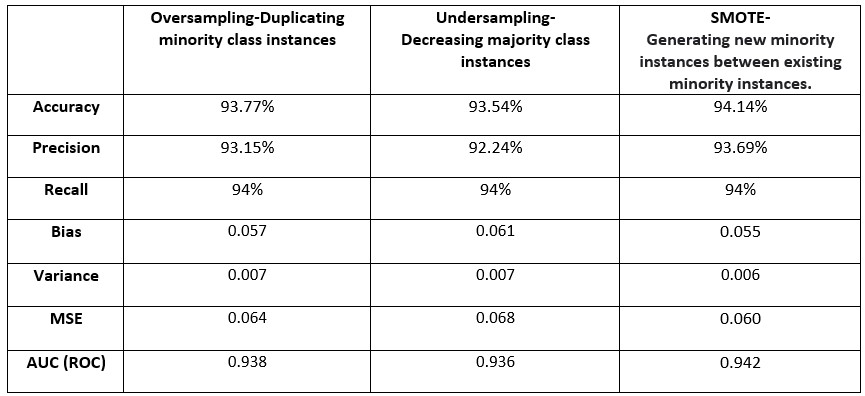

In [2]:
from IPython.display import Image
Image(filename='../Assignment2/Images/adabalance.jpg', width=500)

In [ ]:
Comment: 
•	SMOTE is the best method to balance the dataset in accuracy and precision, as it generates new samples from the minority class rather than duplicating the minority class instances (oversampling) or lowering the majority class samples (undersampling). 
•	Removing majority class samples can be biased and can lead to inaccuracy in the model. Also it might remove useful samples which we would need.  Thus, making Undersampling the worse method to balance this dataset. 
•	Duplicating existing samples can lead to overfitting (high variance). This also increases training, making it slower to compute. However, after mentioning all that this method is better than Undersampling when balancing this dataset.  
•	However, all models have the same sensitivity of 94%. 
•	Other than that, the bias, variance and the mean squared error are at their best state with SMOTE being the data balancer. 

## 1. Individual Model-Support Vector Machines 

### 1.1 Without Data Balancing 

In [60]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(newX, newY,stratify=newY, test_size=0.3,random_state=42)

[0.9352290679304898, 0.9592417061611375, 0.9535545023696682, 0.3949447077409163]


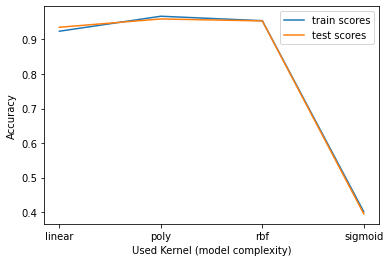

In [61]:
#Kernels to consider: rbf/linear/poly/sigmoid
##ILL COMPARE DEGREES TOO 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores_test = []
scores_train = []
C=[0.00001, 0.0001, 0.01, 1]
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=2, c=C).fit(x_train1, y_train1)
    else:
        svc = SVC(kernel=k).fit(x_train1, y_train1)
        
    y_pred1 = svc.predict(x_test1)
    scores_train.append(metrics.accuracy_score(y_train1, svc.predict(x_train1)))
    scores_test.append(metrics.accuracy_score(y_test1, y_pred1))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.9352290679304898, 0.9592417061611375, 0.9535545023696682, 0.3949447077409163]


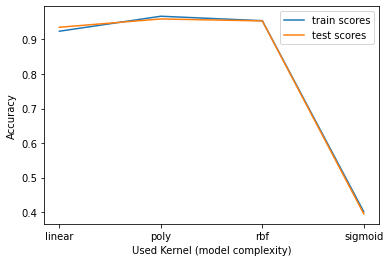

In [62]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores_test = []
scores_train = []
C=[0.00001, 0.0001, 0.01, 1]
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=9, C=c).fit(x_train1, y_train1)
    else:
        svc = SVC(kernel=k).fit(x_train1, y_train1)
        
    y_pred1 = svc.predict(x_test1)
    scores_train.append(metrics.accuracy_score(y_train1, svc.predict(x_train1)))
    scores_test.append(metrics.accuracy_score(y_test1, y_pred1))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### I'll be using RBF as my kernel because both the train and test scores are relatively high with RBF, the degree and C were affecting a much so we'll be using the default values instead

In [63]:
svc = SVC(kernel='rbf').fit(x_train1, y_train1)
y_pred1 = svc.predict(x_test1)
scores_train.append(metrics.accuracy_score(y_train1, svc.predict(x_train1)))
scores_test.append(metrics.accuracy_score(y_test1, y_pred1))

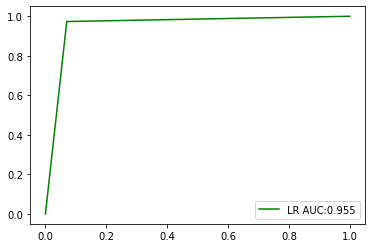

In [64]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred1, y_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [66]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(svc.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test1, y_test1)))

Accuracy on training set: 0.954
Accuracy on test set: 0.954


In [67]:
#Classification Report
print(classification_report(y_test1, y_pred1, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1440
           1       0.94      0.97      0.96      1725

    accuracy                           0.95      3165
   macro avg       0.96      0.95      0.95      3165
weighted avg       0.95      0.95      0.95      3165



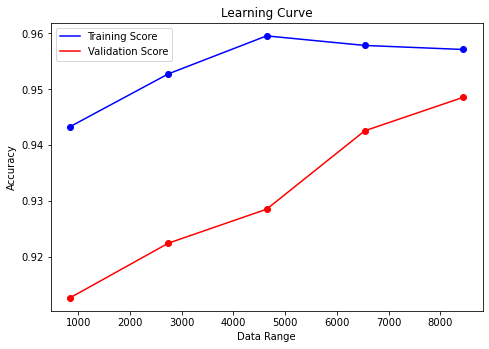

In [68]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svc, newX, newY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b', label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [70]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(svc, x_train1.values, y_train1.values, x_test1.values, y_test1.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.045
Bias: 0.038
Variance: 0.007


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


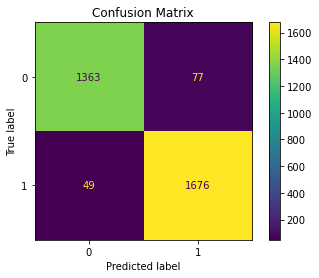

In [71]:
#Confusion Matrix
plot_confusion_matrix(svc, x_test1, y_test1)  
plt.title('Confusion Matrix')
plt.show()

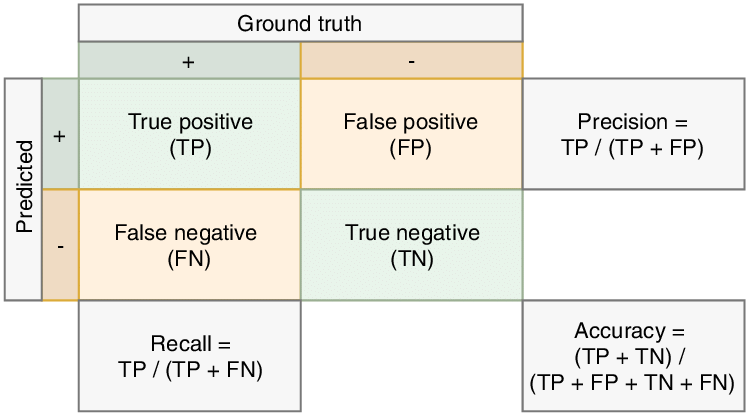

In [72]:
from IPython.display import Image
Image(filename='../Assignment2/Images/Confusion-matrix-and-evaluation-metrics.png', width=300)

In [ ]:
Comment: 
•	RBF kernel had the training and testing score accuracy at 95.4%. 
•	To prove that RBF-based SVM is a good classifier for this dataset, ROC curve is used, to show the area under the curve is big and it around 75%. Making the TPR of the data close to 1. 
•	The model’s precision and recall (f1-score) are greater than 95%. 
•	The model’s learning curve shows that its ideal, and the model is not overfitting nor under fitting.  
•	To prove this further, I calculated the bias and the variance of the model to be 0.038 and 0.007 respectively. These are low values, presenting the model to be ideal.  
•	The error of the model obtained is 0.045, this number is relatively low too. 
•	The confusion matrix displays that the number of:
    o	true positive instances(TP)=1363
    o	false positive instances(TP)=77 --> Precision of the model= 94.7%
    o	true negative instances(TN)=1676
    o	false negative instances(FN)=49 --> Accuracy of the model=96.0%
    o	Model determines more correct predictions than wrong ones by 96%. 

### 1.2 With Feature Selection 

In [73]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(newX, newY,stratify=newY, test_size=0.3,random_state=42)

In [74]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlated_features = correlation(x_train2, 0.7)
print(correlated_features)
newX.drop(labels = correlated_features, axis = 1, inplace = True)

{'Submitting_to_email', 'Abnormal_URL', 'HTTPS_token', 'on_mouseover', 'port', 'popUpWidnow', 'double_slash_redirecting'}


C:\Users\97450\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[0.9352290679304898, 0.9592417061611375, 0.9535545023696682, 0.3949447077409163]


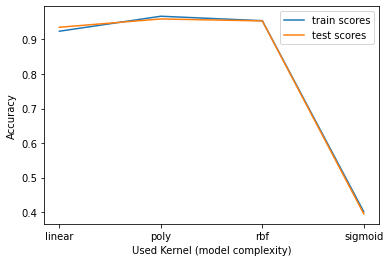

In [75]:
#Kernels to consider: rbf/linear/poly/sigmoid
##ILL COMPARE DEGREES TOO 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores_test = []
scores_train = []
C=[0.00001, 0.0001, 0.01, 1]
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=2, c=C).fit(x_train2, y_train2)
    else:
        svc = SVC(kernel=k).fit(x_train2, y_train2)
        
    y_pred2 = svc.predict(x_test2)
    scores_train.append(metrics.accuracy_score(y_train2, svc.predict(x_train2)))
    scores_test.append(metrics.accuracy_score(y_test2, y_pred2))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.9352290679304898, 0.9592417061611375, 0.9535545023696682, 0.3949447077409163]


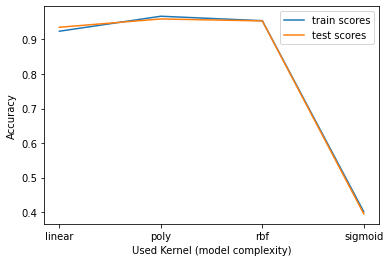

In [76]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores_test = []
scores_train = []
C=[0.00001, 0.0001, 0.01, 1]
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=9, C=c).fit(x_train2, y_train2)
    else:
        svc = SVC(kernel=k).fit(x_train2, y_train2)
        
    y_pred2 = svc.predict(x_test2)
    scores_train.append(metrics.accuracy_score(y_train2, svc.predict(x_train2)))
    scores_test.append(metrics.accuracy_score(y_test2, y_pred2))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### I'll be using RBF as my kernel because both the train and test scores are relatively high with RBF, the degree and C were affecting a much so we'll be using the default values instead

In [77]:
svc = SVC(kernel='rbf').fit(x_train2, y_train2)
y_pred2 = svc.predict(x_test2)
scores_train.append(metrics.accuracy_score(y_train2, svc.predict(x_train2)))
scores_test.append(metrics.accuracy_score(y_test2, y_pred2))

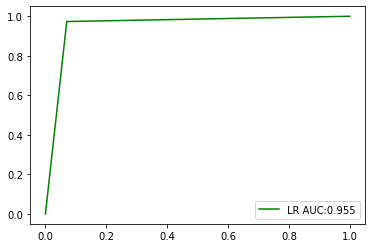

In [78]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred2, y_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_pred2)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [79]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(svc.score(x_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test2, y_test2)))

Accuracy on training set: 0.954
Accuracy on test set: 0.954


In [80]:
#Classification Report
print(classification_report(y_test2, y_pred2, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1440
           1       0.94      0.97      0.96      1725

    accuracy                           0.95      3165
   macro avg       0.96      0.95      0.95      3165
weighted avg       0.95      0.95      0.95      3165



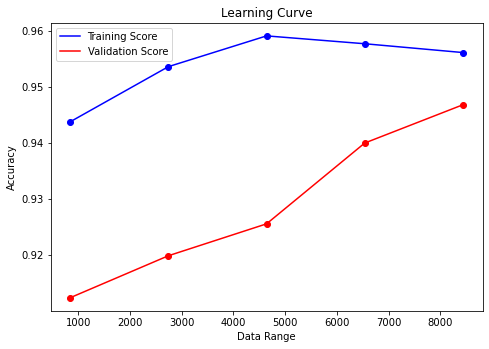

In [81]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svc, newX, newY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b', label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [82]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(svc, x_train2.values, y_train2.values, x_test2.values, y_test2.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.045
Bias: 0.038
Variance: 0.007


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


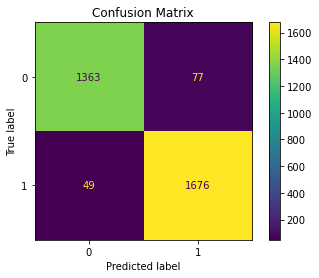

In [83]:
#Confusion Matrix
plot_confusion_matrix(svc, x_test2, y_test2)  
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Comment:
•	RBF kernel had the training and testing score accuracy at 95.4%. 
•	To prove that RBF-based SVM is a good classifier for this dataset, ROC curve is used, to show the area under the curve is big and it around 90%. Making the TPR of the data close to 1. 
•	The model precision and recall (f1-score) can range from 95-96%.  
•	The model’s learning curve shows that its ideal, and the model is not overfitting nor under fitting.  
•	The bias and the variance of the model did not change when feature selection is applied. This shows that the feature selection did not affect this model’s bias and variance. This is compared to the model with no data balance applied. 
•	The confusion matrix displays that the number of:
    o	true positive instances(TP)=1363
    o	false positive instances(FP)=77 --> Precision of the model= 94.7%
    o	true negative instances(TN)=1676
    o	false negative instances(FN)=49 --> Accuracy of the model=96.0%
    o	Model’s determines more correct predictions than wrong ones by 96%.
    o	THE FEATURE SELECTION-BASED MODEL HAS THE SAME RESULTS AS THE MODEL BEFORE BALANCING. 

### 1.3 With SMOTE Balancing 

In [84]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(overX, overY,stratify=overY, test_size=0.3,random_state=42)

[0.9342028985507247, 0.9626086956521739, 0.9608695652173913, 0.40869565217391307]


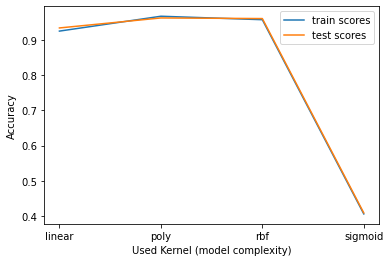

In [85]:
#Kernels to consider: rbf/linear/poly/sigmoid
##ILL COMPARE DEGREES TOO 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores_test = []
scores_train = []
C=[0.00001, 0.0001, 0.01, 1]
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=2, c=C).fit(x_train3, y_train3)
    else:
        svc = SVC(kernel=k).fit(x_train3, y_train3)
        
    y_pred3 = svc.predict(x_test3)
    scores_train.append(metrics.accuracy_score(y_train3, svc.predict(x_train3)))
    scores_test.append(metrics.accuracy_score(y_test3, y_pred3))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.9342028985507247, 0.9626086956521739, 0.9608695652173913, 0.40869565217391307]


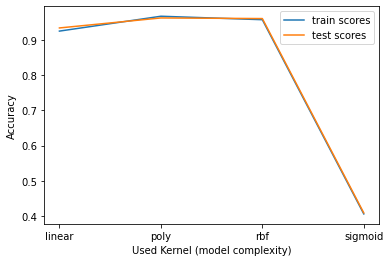

In [86]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores_test = []
scores_train = []
C=[0.00001, 0.0001, 0.01, 1]
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=9, C=c).fit(x_train3, y_train3)
    else:
        svc = SVC(kernel=k).fit(x_train3, y_train3)
        
    y_pred3 = svc.predict(x_test3)
    scores_train.append(metrics.accuracy_score(y_train3, svc.predict(x_train3)))
    scores_test.append(metrics.accuracy_score(y_test3, y_pred3))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### I'll be using RBF as my kernel because both the train and test scores are relatively high with RBF, the degree and C were affecting a much so we'll be using the default values instead

In [87]:
svc = SVC(kernel='rbf').fit(x_train3, y_train3)
y_pred3 = svc.predict(x_test3)
scores_train.append(metrics.accuracy_score(y_train3, svc.predict(x_train3)))
scores_test.append(metrics.accuracy_score(y_test3, y_pred3))

In [88]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(svc.score(x_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test3, y_test3)))

Accuracy on training set: 0.958
Accuracy on test set: 0.961


In [89]:
#Classification Report
print(classification_report(y_test3, y_pred3, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1725
           1       0.95      0.97      0.96      1725

    accuracy                           0.96      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.96      0.96      0.96      3450



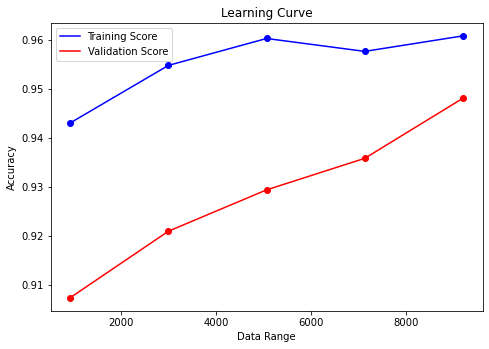

In [90]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svc, overX, overY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b', label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [91]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(svc, x_train3.values, y_train3.values, x_test3.values, y_test3.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.040
Bias: 0.033
Variance: 0.006


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


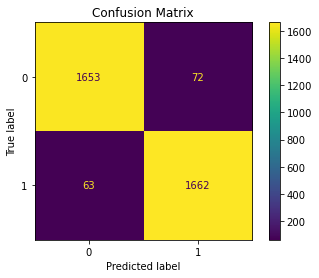

In [92]:
#Confusion Matrix
plot_confusion_matrix(svc, x_test3, y_test3)  
plt.title('Confusion Matrix')
plt.show()

In [ ]:
•	RBF kernel had the training and testing score accuracy to be 95.8% and 96.1% respectively.  
•	To prove that RBF-based SVM is a good classifier for this dataset, ROC curve is used, to show the area under the curve is big and it around 90%. Making the TPR of the data close to 1. 
•	The model’s precision and recall (f1-scores) are higher than the model without data balancing with SMOTE. 
•	The model’s learning curve shows that its ideal, and the model is not overfitting nor under fitting.  
•	To prove this further, I calculated the bias and the variance of the model to be 0.033 and 0.006 respectively. These are low values, presenting the model to be ideal.  
•	This mean the model is low on variance (model is not sensitive) and low on bias (model is not under taught). 
•	The error of the model is at 0.04, lower than the non-smote-based model, this means that the model after balancing has improved.  
•	The confusion matrix displays that the number of:
    o	true positive instances(TP)=1653
    o	false positive instances(FP)=72 --> Precision of the model= 95.8%
    o	true negative instances(TN)=1662
    o	false negative instances(FN)=63 --> Accuracy of the model=96.1%
    o	THIS MODEL IMPROVED SIGNIFIGENTLY WITH DATA BALANCING. 
    o	Model’s determines more correct predictions than wrong ones by 96.1%.

### 1.4 Both Feature Selection and SMOTE respectively 

In [93]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(overX, overY,stratify=overY, test_size=0.3,random_state=42)

In [94]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlated_features = correlation(x_train4, 0.7)
print(correlated_features)
overX.drop(labels = correlated_features, axis = 1, inplace = True)

{'Submitting_to_email', 'Abnormal_URL', 'HTTPS_token', 'on_mouseover', 'port', 'popUpWidnow', 'double_slash_redirecting'}


[0.9342028985507247, 0.9626086956521739, 0.9608695652173913, 0.40869565217391307]


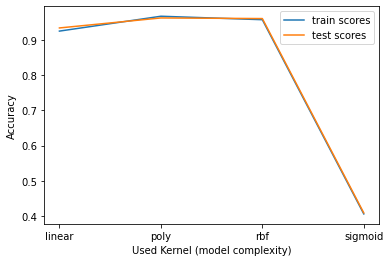

In [95]:
#Kernels to consider: rbf/linear/poly/sigmoid
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores_test = []
scores_train = []
C=[0.00001, 0.0001, 0.01, 1]
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=2, c=C).fit(x_train4, y_train4)
    else:
        svc = SVC(kernel=k).fit(x_train4, y_train4)
        
    y_pred4 = svc.predict(x_test4)
    scores_train.append(metrics.accuracy_score(y_train4, svc.predict(x_train4)))
    scores_test.append(metrics.accuracy_score(y_test4, y_pred4))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### I'll be using RBF as my kernel because both the train and test scores are relatively high with RBF, the degree and C were affecting a much so we'll be using the default values instead

In [96]:
svc = SVC(kernel='rbf').fit(x_train4, y_train4)
y_pred4 = svc.predict(x_test4)
scores_train.append(metrics.accuracy_score(y_train4, svc.predict(x_train4)))
scores_test.append(metrics.accuracy_score(y_test4, y_pred4))

In [97]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(svc.score(x_train4, y_train4)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test4, y_test4)))

Accuracy on training set: 0.958
Accuracy on test set: 0.961


In [98]:
#Classification Report
print(classification_report(y_test4, y_pred4, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1725
           1       0.95      0.97      0.96      1725

    accuracy                           0.96      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.96      0.96      0.96      3450



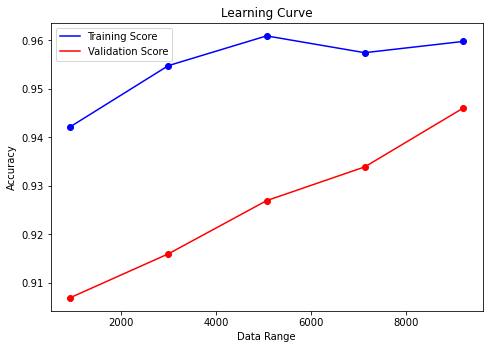

In [99]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svc, overX, overY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b', label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [100]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(svc, x_train4.values, y_train4.values, x_test4.values, y_test4.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.040
Bias: 0.033
Variance: 0.006


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


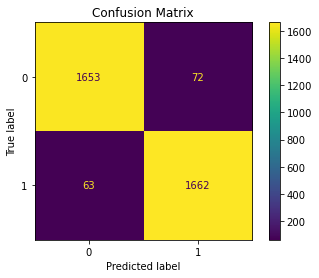

In [101]:
#Confusion Matrix
plot_confusion_matrix(svc, x_test4, y_test4)  
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Comment:
•	RBF kernel had the training and testing score accuracy are 95.8% and 96.1% respectively. 
•	To prove that RBF-based SVM is a good classifier for this dataset, ROC curve is used, to show the area under the curve is big and it around 90%. Making the TPR of the data close to 1. 
•	The model precision and recall (f1-score) is around 96%.  
•	The model’s learning curve shows that its ideal, and the model is not overfitting nor under fitting.  
•	The bias and the variance of the model did not change when feature selection is applied. This shows that the feature selection did not affect this model’s bias and variance. This is compared to the model with no data balance applied. 
Bias=0.0033, Variance=0.006 with the model’s error=0.04 like model 1.3 
(model with SMOTE without FS). 
•	The confusion matrix displays that the number of:
    o	true positive instances(TP)=1653
    o	false positive instances(FP)=72 --> Precision of the model= 95.8%
    o	true negative instances(TN)=1662
    o	false negative instances(FN)=63 --> Accuracy of the model=96.1%
    o	Model’s determines more correct predictions than wrong ones by 96.1%.
    o	THE FEATURE SELECTION AND SMOTE-BASED MODEL HAS THE SAME RESULTS AS THE MODEL AFTER BALANCING WITHOUT FEATURE SELECTION. 

### Pipeline with best SVM model + its features

In [107]:
p=imbPipeline(steps=[('overSample',SMOTE(k_neighbors=7, random_state=42)),('Scaler', StandardScaler()),\
                ('model', SVC(random_state=42, kernel='rbf'))])
p.fit(x_train1,y_train1)
y_pred=p.predict(x_test1)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test1))

ACC of model: 0.9580 with IMPipeLine 


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


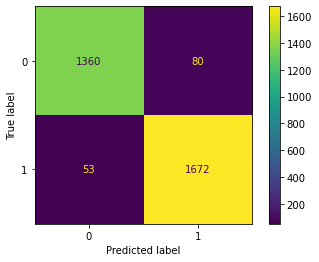

In [108]:
plot_confusion_matrix(p,x_test1,y_test1)

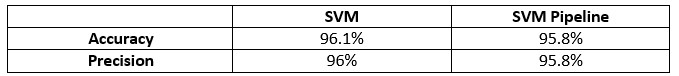

In [111]:
from IPython.display import Image
Image(filename='../Assignment2/Images/svmpipeline.jpg', width=600)

In [ ]:
Comment: 
•	As shown above, the accuracy and the precision of the Pipeline-based model is worse. 

## 2. Ensemble Model-Adaboosting

### 2.1. Without SMOTE

In [197]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(newX, newY,stratify=newY, test_size=0.3,random_state=42)

In [198]:
for d in range(1, 10):
    adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=200, learning_rate=0.05, random_state=42)
    adaBoost.fit(x_train1, y_train1)
    y_pred1 = adaBoost.predict(x_test1)
    print("Accuracy with depth  "+str(d)+" :"+str(accuracy_score(y_test1, y_pred1)))

Accuracy with depth  1 :0.9371248025276462
Accuracy with depth  2 :0.944391785150079
Accuracy with depth  3 :0.9548183254344392
Accuracy with depth  4 :0.9630331753554502
Accuracy with depth  5 :0.9655608214849921
Accuracy with depth  6 :0.9709320695102686
Accuracy with depth  7 :0.966824644549763
Accuracy with depth  8 :0.9665086887835703
Accuracy with depth  9 :0.9624012638230648


##### As shown above the best accuracy is with max_depth=6, so I'll be using that for this model. 

In [199]:
#max_depth=6 (I made the learning rate=0.05 because its closer to 0 then 0.1)
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=200, learning_rate=0.05, random_state=42)
adaBoost.fit(x_train1, y_train1)
y_pred1 = adaBoost.predict(x_test1)

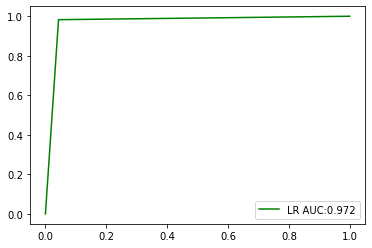

In [200]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred1, y_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [201]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(adaBoost.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(adaBoost.score(x_test1, y_test1)))

Accuracy on training set: 0.990
Accuracy on test set: 0.971


In [202]:
#Classification Report
print(classification_report(y_test1, y_pred1, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1440
           1       0.96      0.98      0.97      1725

    accuracy                           0.97      3165
   macro avg       0.97      0.97      0.97      3165
weighted avg       0.97      0.97      0.97      3165



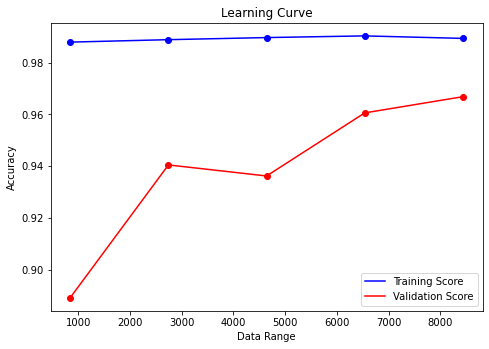

In [203]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(adaBoost, newX, newY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [204]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(adaBoost, x_train1.values, y_train1.values, x_test1.values, y_test1.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.037
Bias: 0.023
Variance: 0.013


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


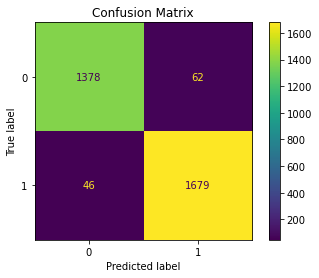

In [205]:
#Confusion Matrix
plot_confusion_matrix(adaBoost, x_test1, y_test1)  
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Comment:
•	The training and testing score accuracy is 99% and 97.1% respectively.  
•	The f1-score (the overall recall and precision)= 97%. 
•	To prove that max_depth=7-based AdaBoosting classifier is a good classifier for this dataset, ROC curve is used, to show the area under the curve is big and it around 90%. Making the TPR of the data close to 1. 
•	The model’s learning curve shows that its ideal, and the model is not overfitting nor under fitting.  
•	To prove this further, I calculated the bias and the variance of the model to be 0.023 and 0.013 respectively. These are low values, presenting the model to be ideal.  
•	The error of the model obtained is 0.037, this number is relatively low too. 
•	The confusion matrix displays that the number of:
    o	true positive instances(TP)=1378
    o	false positive instances(FP)=62 --> Precision of the model= 95.69%
    o	true negative instances(TN)=1679
    o	false negative instances(FN)=46 --> Accuracy of the model=96.6%
    o	Adaboosting model is already better than the SVM model with SMOTE!!
    o	Model’s determines more correct predictions than wrong ones by 96.6%.
    o	THE FEATURE SELECTION-BASED MODEL HAS THE SAME RESULTS AS THE MODEL BEFORE BALANCING. 

### 2.2. With Feature Selection

In [206]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(newX, newY,stratify=newY, test_size=0.3,random_state=42)

In [207]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlated_features = correlation(x_train2, 0.5)
print(correlated_features)
newX.drop(labels = correlated_features, axis = 1, inplace = True)

{'Redirect', 'Request_URL', 'URL_of_Anchor', 'Iframe'}


C:\Users\97450\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [208]:
for d in range(1, 10):
    adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=200, learning_rate=0.05, random_state=42)
    adaBoost.fit(x_train2, y_train2)
    y_pred2 = adaBoost.predict(x_test2)
    print("Accuracy with depth  "+str(d)+" :"+str(accuracy_score(y_test2, y_pred2)))

Accuracy with depth  1 :0.9371248025276462
Accuracy with depth  2 :0.944391785150079
Accuracy with depth  3 :0.9548183254344392
Accuracy with depth  4 :0.9630331753554502
Accuracy with depth  5 :0.9655608214849921
Accuracy with depth  6 :0.9709320695102686
Accuracy with depth  7 :0.966824644549763
Accuracy with depth  8 :0.9665086887835703
Accuracy with depth  9 :0.9624012638230648


##### As shown above the best accuracy is with max_depth=6,  so I'll be using that for this model. 

In [209]:
#max_depth=6 (I made the learning rate=0.05 because its closer to 0 then 0.1)
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=200, learning_rate=0.05, random_state=42)
adaBoost.fit(x_train2, y_train2)
y_pred2 = adaBoost.predict(x_test2)

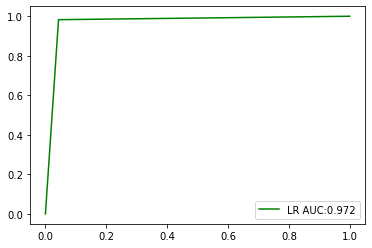

In [210]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred2, y_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_pred2)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [211]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(adaBoost.score(x_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(adaBoost.score(x_test2, y_test2)))

Accuracy on training set: 0.990
Accuracy on test set: 0.971


In [212]:
#Classification Report
print(classification_report(y_test2, y_pred2, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1440
           1       0.96      0.98      0.97      1725

    accuracy                           0.97      3165
   macro avg       0.97      0.97      0.97      3165
weighted avg       0.97      0.97      0.97      3165



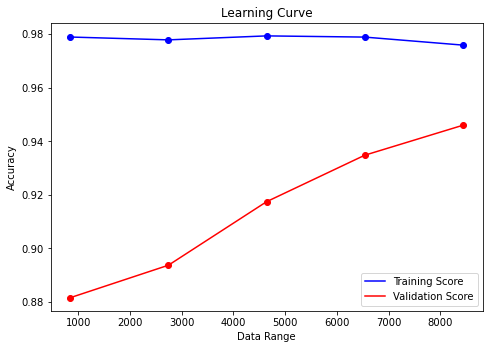

In [213]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(adaBoost, newX, newY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [214]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(adaBoost, x_train2.values, y_train2.values, x_test2.values, y_test2.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.037
Bias: 0.023
Variance: 0.013


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


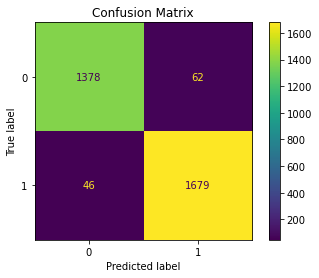

In [215]:
#Confusion Matrix
plot_confusion_matrix(adaBoost, x_test2, y_test2)  
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Comment:
    •	No correlation pairwise (instances exceeding 0.7) so   nothing has been dropped and the results are the same as 2.1. 
    •	Cannot change the parameters as I will compare with the other models having the same parameters.  
    •	Model’s determines more correct predictions than wrong ones by 96.6%.
    •	THE FEATURE SELECTION-BASED MODEL HAS THE SAME RESULTS AS THE MODEL BEFORE BALANCING. 

### 2.3. With SMOTE

In [216]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(overX, overY,stratify=overY, test_size=0.3,random_state=42)

In [217]:
for d in range(1, 10):
    adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=200, learning_rate=0.05, random_state=42)
    adaBoost.fit(x_train3, y_train3)
    y_pred3 = adaBoost.predict(x_test3)
    print("Accuracy with depth  "+str(d)+" :"+str(accuracy_score(y_test3, y_pred3)))

Accuracy with depth  1 :0.931304347826087
Accuracy with depth  2 :0.943768115942029
Accuracy with depth  3 :0.9620289855072464
Accuracy with depth  4 :0.9666666666666667
Accuracy with depth  5 :0.9692753623188406
Accuracy with depth  6 :0.9710144927536232
Accuracy with depth  7 :0.9710144927536232
Accuracy with depth  8 :0.9710144927536232
Accuracy with depth  9 :0.9663768115942029


##### As shown above the best accuracy is with max_depth=6, so I'll be using that for this model. 

In [218]:
#max_depth=6 (I made the learning rate=0.05 because its closer to 0 then 0.1)
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=200, learning_rate=0.05, random_state=42)
adaBoost.fit(x_train3, y_train3)
y_pred3 = adaBoost.predict(x_test3)

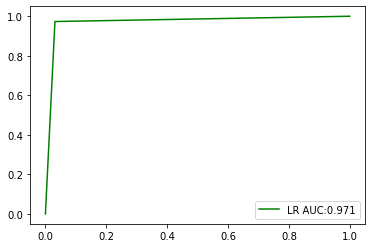

In [219]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred3, y_test3)

fpr, tpr, thresholds = roc_curve(y_test3, y_pred3)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [220]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(adaBoost.score(x_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(adaBoost.score(x_test3, y_test3)))

Accuracy on training set: 0.989
Accuracy on test set: 0.971


In [221]:
#Classification Report
print(classification_report(y_test3, y_pred3, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1725
           1       0.97      0.97      0.97      1725

    accuracy                           0.97      3450
   macro avg       0.97      0.97      0.97      3450
weighted avg       0.97      0.97      0.97      3450



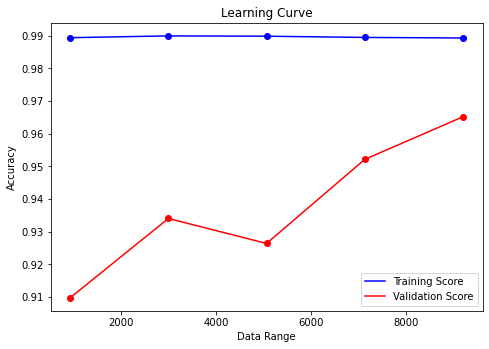

In [222]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(adaBoost, overX, overY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [223]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(adaBoost, x_train3.values, y_train3.values, x_test3.values, y_test3.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.034
Bias: 0.020
Variance: 0.014


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


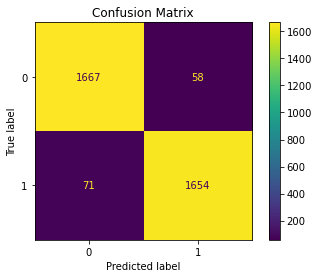

In [224]:
#Confusion Matrix
plot_confusion_matrix(adaBoost, x_test3, y_test3)  
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Comment:
•	The training and testing score accuracy is 98.9% and 97.1% respectively.  
•	The f1-score (the overall recall and precision)= 97%. 
•	To prove that max_depth=6-based AdaBoosting classifier is a good classifier for this dataset, ROC curve is used, to show the area under the curve is big and it around 90%. Making the TPR of the data close to 1. 
•	The model’s learning curve shows that its ideal, and the model is not overfitting nor under fitting.  
•	To prove this further, I calculated the bias and the variance of the model to be 0.02 and 0.014 respectively. These are low values, presenting the model to be ideal.  
•	The error of the model obtained is 0.034, this number is relatively low too. 
•	The confusion matrix displays that the number of:
    o	true positive instances(TP)=1667
    o	false positive instances(FP)=58  Precision of the model= 96.6%
    o	true negative instances(TN)=1654
    o	false negative instances(FN)=71  Accuracy of the model=96.3%
    o	The difference between the model before and after balancing is the precision of the model, the model after balancing increased the model’s precision (the correct predictions) by 1%. 
    o	Model’s determines more correct predictions than wrong ones by 96.3%.
    o	However, the accuracy of the model before and after is very similar. 

### 2.4 With Feature Selection and SMOTE respectively

In [225]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(overX, overY,stratify=overY, test_size=0.3,random_state=42)

In [226]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlated_features = correlation(x_train4, 0.7)
print(correlated_features)
overX.drop(labels = correlated_features, axis = 1, inplace = True)

set()


In [227]:
for d in range(1, 10):
    adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=200, learning_rate=0.05, random_state=42)
    adaBoost.fit(x_train4, y_train4)
    y_pred4 = adaBoost.predict(x_test4)
    print("Accuracy with depth  "+str(d)+" :"+str(accuracy_score(y_test4, y_pred4)))

Accuracy with depth  1 :0.931304347826087
Accuracy with depth  2 :0.943768115942029
Accuracy with depth  3 :0.9620289855072464
Accuracy with depth  4 :0.9666666666666667
Accuracy with depth  5 :0.9692753623188406
Accuracy with depth  6 :0.9710144927536232
Accuracy with depth  7 :0.9710144927536232
Accuracy with depth  8 :0.9710144927536232
Accuracy with depth  9 :0.9663768115942029


#### As shown above the best accuracy is with max_depth=6, so I'll be using that for this model. 

In [228]:
#max_depth=6 (I made the learning rate=0.05 because its closer to 0 then 0.1)
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=200, learning_rate=0.05, random_state=42)
adaBoost.fit(x_train4, y_train4)
y_pred4 = adaBoost.predict(x_test4)

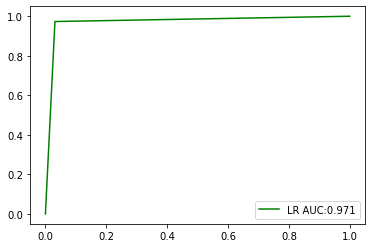

In [229]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred4, y_test4)

fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [230]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(adaBoost.score(x_train4, y_train4)))
print("Accuracy on test set: {:.3f}".format(adaBoost.score(x_test4, y_test4)))

Accuracy on training set: 0.989
Accuracy on test set: 0.971


In [231]:
#Classification Report
print(classification_report(y_test4, y_pred4, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1725
           1       0.97      0.97      0.97      1725

    accuracy                           0.97      3450
   macro avg       0.97      0.97      0.97      3450
weighted avg       0.97      0.97      0.97      3450



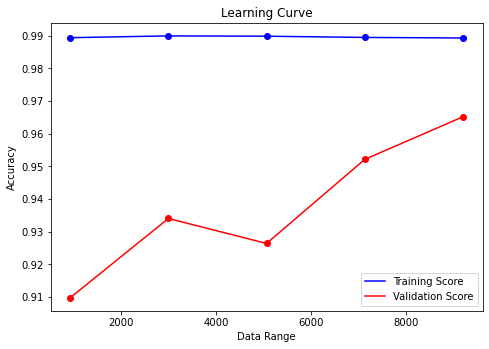

In [232]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(adaBoost, overX, overY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [233]:
#Bias(Underfitting) & Varience(Overfitting)
mse, bias, var = bias_variance_decomp\
(adaBoost, x_train4.values, y_train4.values, x_test4.values, y_test4.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.034
Bias: 0.020
Variance: 0.014


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


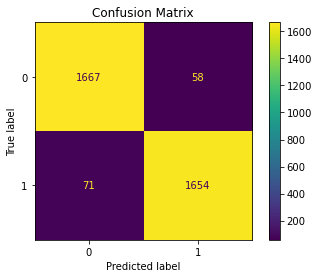

In [234]:
#Confusion Matrix
plot_confusion_matrix(adaBoost, x_test4, y_test4)  
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Comment:
•	No correlation pairwise (instances exceeding 0.7) so nothing has been dropped and the results are the same as 2.1. 
•	Cannot change the parameters as I will compare with the other models having the same parameters. 
•	Model’s determines more correct predictions than wrong ones by 96.6%.
•	THE FEATURE SELECTION-BASED MODEL HAS THE SAME RESULTS AS THE MODEL AFTER BALANCING. 

## Overall Comparasion between SMOTE and the Models (Feature Selection is not included)

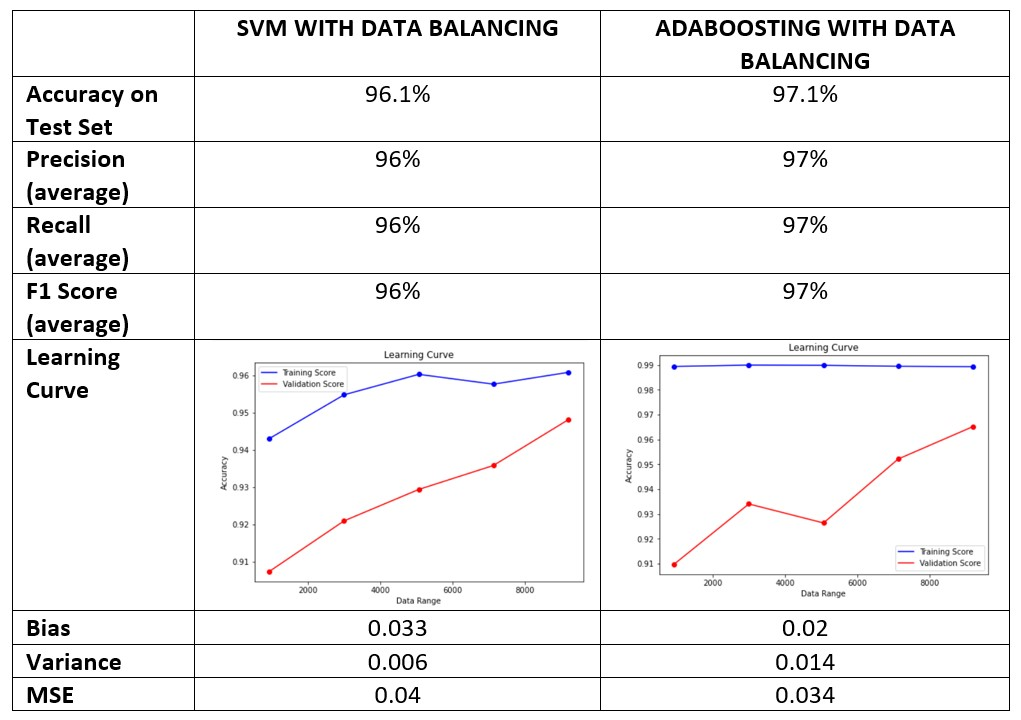

In [4]:
from IPython.display import Image
Image(filename='../Assignment2/Images/Comparison.jpg', width=600)

In [ ]:
Comment: 
•	Adaboosting-based model has a higher accuracy by 1%, this means that it has a higher percentage of the correct classifications than the SVM-based model. 
•	Adaboosting-based model has a higher precision by 1%, this means that its data is close to each other by 1% relative to the SVM model. 
•	Adaboosting-based model has a higher recall (TPR) by 1%, this means that the model can detect more positive instances relative to the SVM model. 
•	F1-score is the combination of both the precision and the recall, the higher these values, the higher the f1-score. This displays that the Adaboosting-based model has a higher recall (TPR)  and a Precision (sensitivity) by 1%, this means that the model can detect more positive instances and negative ones better than the SVM model. 
•	Both models seems to not over nor under fit, however the learning curve of the Adaboosting model has a bigger gap than the SVM one, meaning it overfits more, as its variance is higher. Also the Adaboosting training curve seems to be not training and stays at 99% accuracy. 
•	So, the Adaboosting model has a higher variance (by a small amount of 0.008), meaning that it is more sensitive to the data than the SVM model. This variance difference can be negligible; it is too small. 
•	However, the SVM model has a higher bias (by a bit 0.01), illustrating that its model can oversimplify. This bias difference can be negligible; it is too small. 
•	The error of both models is small too, at around 0.03/4, thus this too can be ignored. 

### Pipeline with the best Adaboost model + its features 

In [254]:
p=imbPipeline(steps=[('overSample',SMOTE(k_neighbors=7, random_state=42)),('Scaler', StandardScaler()),\
                ('model', AdaBoostClassifier(n_estimators=21, random_state=42))])
p.fit(x_train1,y_train1)
y_pred=p.predict(x_test1)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test1))

ACC of model: 0.9441 with IMPipeLine 


C:\Users\97450\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


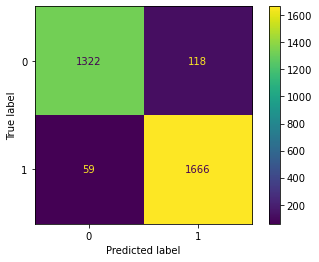

In [256]:
plot_confusion_matrix(p,x_test1,y_test1)

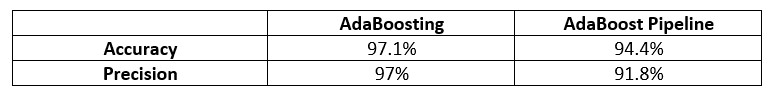

In [257]:
from IPython.display import Image
Image(filename='../Assignment2/Images/pipeline.jpg', width=600)

In [ ]:
Comment:
    •	As shown above, the accuracy and the precision of the Pipeline-based model is worse.
    •	However, ill be trying the pipeline of the test dataset (Credit)